# Detect disturbed tress

## Packages and Data

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.data_loader import DataLoader
from utils.calculate_indices import CalculateIndices

In [3]:
dataloader = DataLoader()
df_base = dataloader.load_transform("../../data/Trainings_Datensatz.csv")
df = dataloader.date_feature_extraction(df_base)
df = dataloader.feature_extraction(df)

In [4]:
calculateindices = CalculateIndices()
df = calculateindices.add_all_indices(df)

In [5]:
df

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
808190,2017-03-13,1,0,72,147,204,145,400,1193,1435,...,0.833142,0.751068,1520.5,1.154617,1.249353,0.916571,562.758621,-32.156368,-0.999372,1448
808191,2017-03-27,1,0,86,137,222,154,389,1247,1561,...,0.819988,0.750981,1480.0,1.148907,1.229623,0.909994,474.883117,-32.434732,-0.999358,1403
808192,2017-04-09,1,0,99,160,248,169,395,1209,1454,...,0.801059,0.708578,1445.5,1.140640,1.201236,0.900530,422.579882,-31.197789,-0.999347,1361
808193,2017-04-22,1,0,112,146,247,152,391,1354,1628,...,0.833333,0.736533,1596.0,1.154701,1.249657,0.916667,491.836842,-30.333333,-0.999402,1520
808194,2017-04-29,1,0,119,171,264,186,419,1353,1731,...,0.813253,0.735338,1713.0,1.145973,1.219573,0.906627,419.901075,-32.782655,-0.999446,1620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311855,2022-09-05,28212,0,248,318,450,338,619,1664,2012,...,0.740897,0.634444,2102.0,1.113956,1.111132,0.870448,411.689941,-31.960766,-0.999560,1933
3311856,2022-09-24,28212,0,267,202,334,229,513,1666,2136,...,0.815024,0.729555,2132.5,1.146745,1.222290,0.907512,508.967686,-32.916739,-0.999555,2018
3311857,2022-10-03,28212,0,276,184,311,205,504,1580,1910,...,0.813382,0.719946,1889.5,1.146029,1.219795,0.906691,588.081951,-31.509294,-0.999498,1787
3311858,2022-10-27,28212,0,300,353,560,362,732,1944,2254,...,0.749654,0.601990,2349.0,1.117879,1.124287,0.874827,598.541436,-31.247525,-0.999605,2168


## Analysis ndvi

In [ ]:
df_notdisturbed = df[df["disturbed"]==False]
df_yearly = df_notdisturbed.groupby(["id", "year"])["ndvi"].mean().reset_index()
std_df = df_yearly.groupby("id")["ndvi"].std().reset_index().sort_values("ndvi", ascending=False)
std_df

,id,ndvi
19882,22851,0.333592
3598,4169,0.237127
21605,24809,0.237124
13848,15935,0.223795
7748,8928,0.206894
...,...,...
2889,3329,0.002543
8314,9581,0.002533
1877,2148,0.002491
16070,18469,0.002479


In [27]:
df[df["id"]==22851]

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
3836795,2017-03-31,22851,0,90,617,957,985,1586,2540,3105,...,0.561540,0.528804,3015.5,1.030311,0.842217,0.780770,774.161218,-45.373166,-0.999715,2523
3836796,2017-05-02,22851,0,122,536,899,644,1519,3234,3647,...,0.744495,0.604487,4075.0,1.115569,1.116632,0.872248,1651.086957,-35.497959,-0.999773,3753
3836797,2017-05-11,22851,0,131,389,773,495,1201,3020,3557,...,0.779018,0.642956,3737.5,1.130937,1.168396,0.889509,1370.353131,-33.942276,-0.999749,3490
3836798,2017-06-02,22851,0,153,280,799,458,1138,3456,3959,...,0.823337,0.664145,4498.0,1.150364,1.234886,0.911668,1351.685590,-30.396031,-0.999788,4269
3836799,2017-06-20,22851,0,171,497,947,625,1225,3013,3883,...,0.737945,0.607867,3832.5,1.112630,1.106802,0.868973,940.800000,-36.736577,-0.999759,3520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3836928,2022-09-28,22851,0,271,2934,2935,3325,2437,2572,2653,...,-0.008340,-0.050465,1607.5,0.701185,-0.012509,0.495830,-520.675128,86.688889,-0.999694,-55
3836929,2022-10-01,22851,0,274,2574,2774,3019,2531,2398,2434,...,-0.004158,-0.065284,1484.5,0.704161,-0.006236,0.497921,-327.294601,-74.203008,-0.999666,-25
3836930,2022-10-09,22851,0,282,2248,2405,2440,2267,2249,2567,...,0.034428,0.032582,1394.0,0.731046,0.051637,0.517214,-128.587213,228.166667,-0.999618,174
3836931,2022-10-11,22851,0,284,2434,2626,2859,2528,2672,2596,...,0.021226,-0.005745,1553.5,0.721960,0.031836,0.510613,-234.142847,23.833333,-0.999665,124


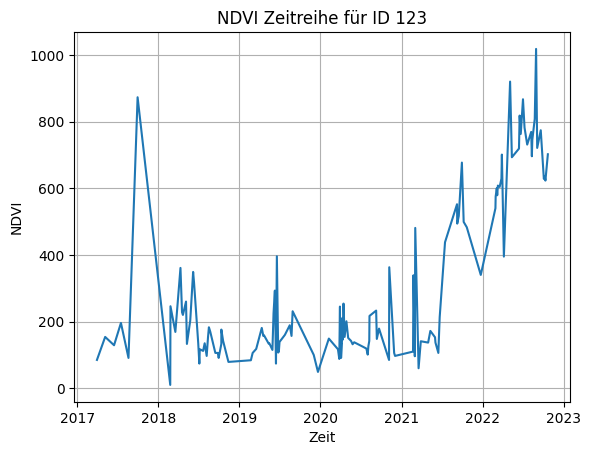

In [34]:
df_sub = df[df["id"] == 21008]

plt.plot(df_sub["time"], df_sub["b2"])

plt.title("NDVI Zeitreihe für ID 123")
plt.xlabel("Zeit")
plt.ylabel("NDVI")
plt.grid(True)
plt.show()

In [ ]:
# Idee: für jedes feature pro jahr und dann std und dann korr mit is disturbed